In [1]:
import kagglehub
path = kagglehub.dataset_download("ruchikakumbhar/calories-burnt-prediction")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/calories-burnt-prediction


In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/kaggle/input/calories-burnt-prediction/calories.csv')
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [13]:
lb = LabelEncoder()
df['Gender'] = lb.fit_transform(df['Gender'])

In [30]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


<Axes: >

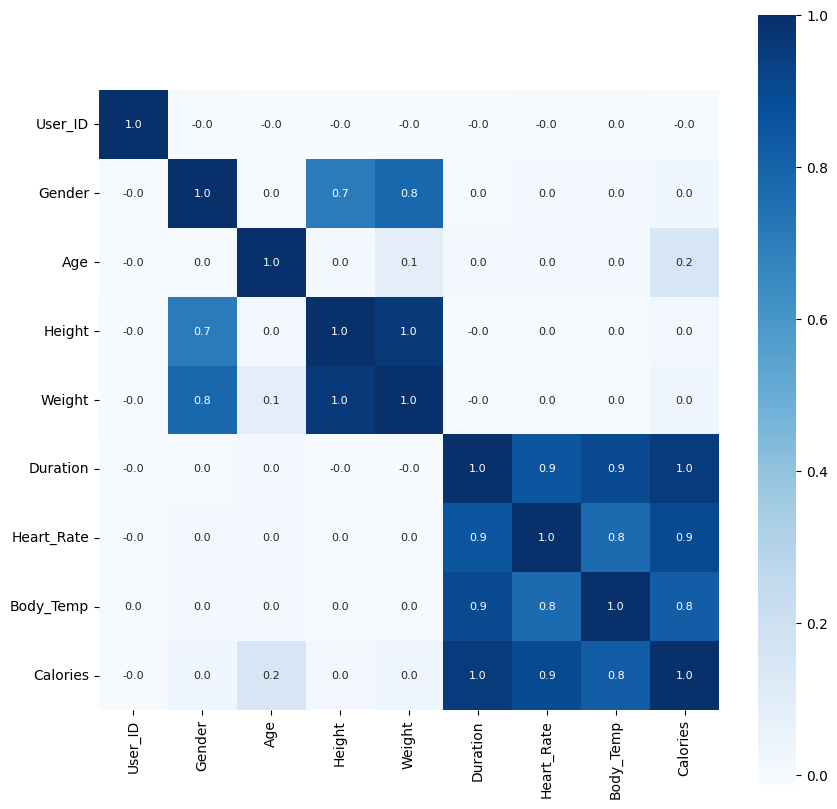

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

/tmp/ipython-input-3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

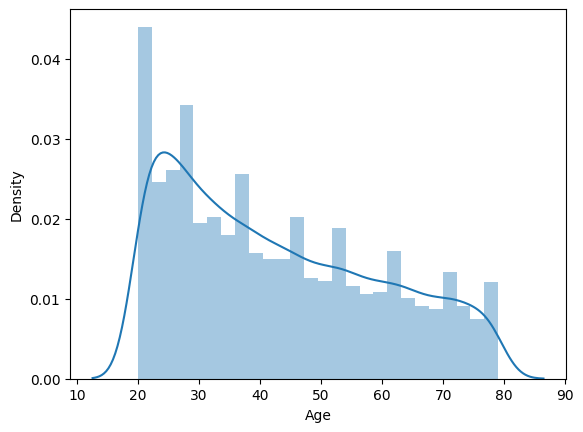

In [26]:
sns.distplot(df['Age'])

/tmp/ipython-input-3220751949.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Body_Temp'])


<Axes: xlabel='Body_Temp', ylabel='Density'>

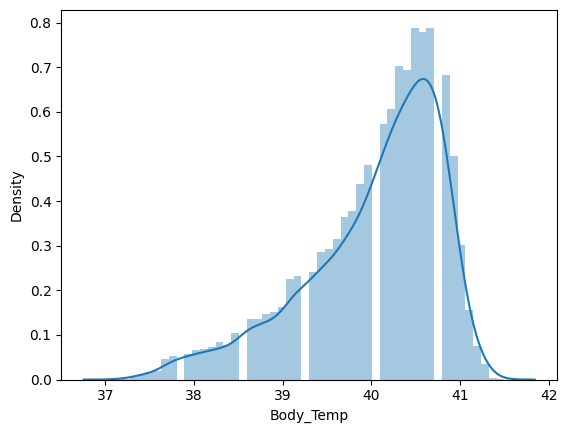

In [28]:
sns.distplot(df['Body_Temp'])

In [20]:
X = df.drop(columns=['Calories','User_ID'],axis=1)
Y = df['Calories']

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=46)

In [32]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
y_pred_lr = lr.predict(X_test)

In [33]:
xgb = XGBRegressor()
xgb.fit(X_train,Y_train)
y_pred_xgb = xgb.predict(X_test)

In [36]:
lr_r2 = metrics.r2_score(Y_test,y_pred_lr)
xgb_r2 = metrics.r2_score(Y_test,y_pred_xgb)
lr_mea = metrics.mean_absolute_error(Y_test,y_pred_lr)
xgb_mea = metrics.mean_absolute_error(Y_test,y_pred_xgb)

In [37]:
print("R2 score for Linear Regression: ",lr_r2)
print("Mean Absolute Error for Linear Regression: ",lr_mea)
print("_____________________________________________________")
print("R2 score for XGBoost: ",xgb_r2)
print("Mean Absolute Error for XGBoost: ",xgb_mea)

R2 score for Linear Regression:  0.9666507433189194
Mean Absolute Error for Linear Regression:  8.538161656394365
_____________________________________________________
R2 score for XGBoost:  0.9988618661685033
Mean Absolute Error for XGBoost:  1.3944195627917846
